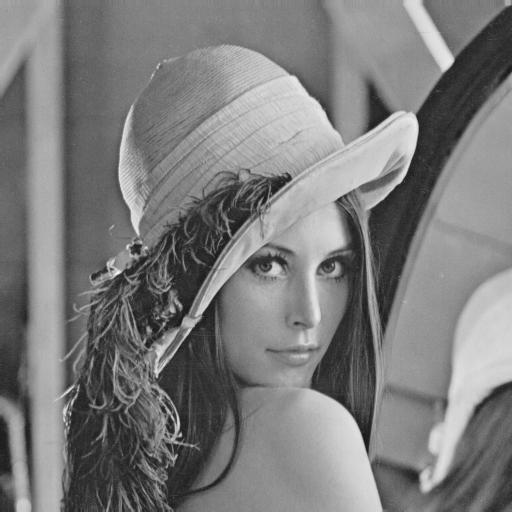

In [7]:
#### origin image
import numpy as np
from PIL import Image
import cv2

# 用來顯示圖片的函數
from IPython.display import display
def show(img_array):
    display(Image.fromarray(img_array))

img_array = cv2.imread('lena.bmp')
img_array_g = cv2.imread('lena.bmp',cv2.IMREAD_GRAYSCALE)

show(img_array)

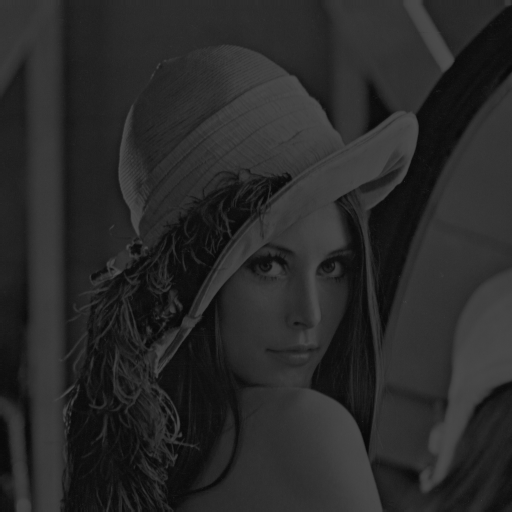

In [41]:
img_array_dark = np.uint8(img_array_g/3)
show(img_array_dark)
Image.fromarray(img_array_dark).save('dark_lena.jpg')

In [37]:
def histogram_equalization(img_array_g):
    row,col = img_array_g.shape
    pixels_count = np.array([0 for i in range(256)])
    pixels_new = np.array([0 for i in range(256)])
    
    for r in range(row):
        for c in range(col):
            pixels_count[img_array_g[r][c]] += 1 
    
    for p in range(256):
        if(p == 0):
            pixels_new[p] = pixels_count[p]
        else:
            pixels_new[p] = pixels_new[p-1] + pixels_count[p]
    
    pixels_new = pixels_new*255/(row*col)

    img_equalization = np.copy(img_array_g)
    for r in range(row):
        for c in range(col):
            img_equalization[r][c] = pixels_new[img_equalization[r][c]]
    
    return np.uint8(img_equalization)

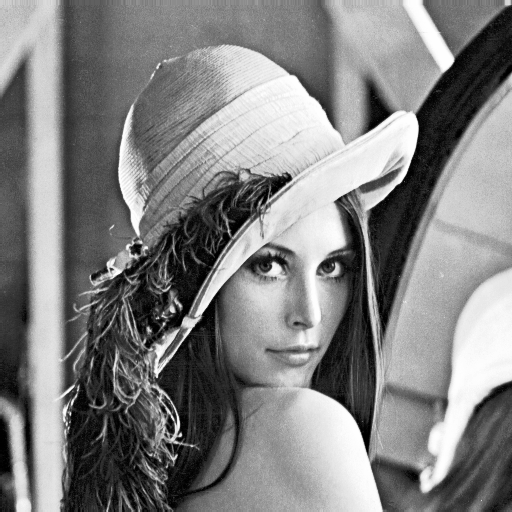

In [44]:
img_equalization = histogram_equalization(img_array_dark)

show(img_equalization)
Image.fromarray(img_equalization).save('lena_equalization.jpg')